# Überwachtes Lernen 2

## Lernziele
* Die [Performance](https://janalasser.at/lectures/MC_KI/VO2_2_performance/) eines Klassifikators auf Testdaten messen können.
* Überwachtes Lernen zur [Regression](https://janalasser.at/lectures/MC_KI/VO2_5_regression/) in Python implementieren können.
* Die Performance einer Regression messen können.

## Train-test Vorgehen
Wir verwenden wieder den [K nächste Nachbarn](https://janalasser.at/lectures/MC_KI/VO1_3_algorithmen_ueberwachtes_lernen/#/2/0/9) Algorithmus, den wir auch schon im letzten Kursteil verwendet haben. Im letzten Kursteil hatten wir auf gut Glück Hyperparameter (z.B. die Anzahl der Nachbarn, die wir in die Klassifizierung mit einbeziehen) durchprobiert. Nun möchten wir das etwas systematischer angehen.

In [1]:
# als ersten Schritt importieren wir den Datensatz mit dem wir arbeiten wollen
import seaborn as sns
daten_titanic = sns.load_dataset("titanic")

# wir filtern die Daten und entfernen NaN-Werte
interessante_spalten = ["age", "fare", "pclass", "adult_male", "survived"]
daten_titanic_gefiltert = daten_titanic[interessante_spalten].copy()
daten_titanic_gefiltert = daten_titanic_gefiltert.dropna()

# wir legen fest, welche Spalten die Attribute enthalten, und welche
# Spalte das label bzw. den Zielwert, den wir vorhersagen möchten
label = "survived"
attribute = ["age", "fare", "pclass", "adult_male"]

x = daten_titanic_gefiltert[attribute]
y = daten_titanic_gefiltert[label]

In [2]:
# und trainieren einen Klassifikator mit n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x, y)

KNeighborsClassifier()

In der [Vorlesung](https://janalasser.at/lectures/MC_KI/VO2_2_performance/#/1/1/1) haben wir als erste Möglichkeit, die Performance eines Klassifikators zu messen, die Genauigkeit (accuracy) kennen gelernt. Sie ist definiert als 1 - Fehlerrate des Klassifikators. In `scikit-learn` können wir die Genauigkeit mit Hilfe der `score()` Funktion des trainierten Klassifikators ausrechnen.

Die `score()` Funktion nimmt als Argumente die Attribute und Zielwerte der Beobachtungen, sagt für jede Beobachtung anhand der Attribute die Zielwerte voraus, und vergleicht die Vorhersagen dann mit den wahren Zielwerten, um die Fehlerrate bzw. die Genauigkeit zu berechnen:

In [3]:
# berechne die Genauigkeit
knn_classifier.score(x, y)

0.7941176470588235

In der [Vorlesung](https://janalasser.at/lectures/MC_KI/VO2_3_underfitting_overfitting/#/2/3/7) haben wir auch darüber gesprochen, dass Klassifikatoren dazu tendieren, ihre Trainingsdaten "auswendig" zu lernen (overfitting). Entsprechend unterschätzt der Vorhersagefehler, den wir mit Hilfe der Trainingsdaten oben berechnet haben, wahrscheinlich den wahren Vorhersagefehler für Daten, die der Klassifikator nicht während des Trainings gesehen hat.

Wir teilen deshalb den Datensatz in einen Teil, den wir zum Training verwenden (Trainingsdaten), und einen Teil, den wir dazu verwenden, die Performance zu messen (Testdaten).

![train-test-split](https://drive.google.com/uc?id=16MiFcHTI1NBbcR9HiVtgxmq2inJWQaOf)

`scikit-learn` bietet eine eingebaute Funktion `train_test_split()`, die das Aufteilen der Daten für uns übernimmt. Sie gibt vier DataFrames zurück. Welche Beobachtungen in welchem Datensatz landen, wird zufällig festgelegt:
* `x_training`: die Attribute der Trainingsdaten
* `x_test`: die Attribute der Testdaten
* `y_training`: die Zielwerte (label) der Trainingsdaten
* `y_test`: die Zielwerte (label) der Testdaten

Mit dem Parameter `test_size` legen wir den Anteil der Daten fest, der für die Testdaten verwendet werden soll – hier 20%.  

Mit dem Parameter `random_state` halten wir den Zufall fest. Das heißt, dass die Funktion `train_test_split()` wenn wir sie zwei mal mit dem selben `random_state` aufrufen, die selbe Aufteilung in Trainings- und Testdaten zurückgibt. Es ist gute Praxis, den Parameter `random_state` immer auf einen (beliebigen) Wert zu setzen, damit die Ergebnisse des Trainings und der Performancemessung reprouzierbar sind und nicht vom Zufall abhängen.

In [ ]:
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# wir trainieren wieder unseren Klassifikator, diesmal nur mit den Trainingsdaten
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_training, y_training)

In [7]:
# und evaluieren die Performance, aber diesmal mit den Testdaten
knn_classifier.score(x_test, y_test)

0.6993006993006993

In [8]:
# zum Vergleich: die Performance auf den Trainingsdaten ist deutlich höher
knn_classifier.score(x_training, y_training)

0.7845884413309983

## Systematisch Klassifikations-Performance evaluieren
Wir verwenden wieder den [K nächste Nachbarn](https://janalasser.at/lectures/MC_KI/VO1_3_algorithmen_ueberwachtes_lernen/#/2/0/9) Algorithmus, den wir auch schon im letzten Kursteil verwendet haben. Im letzten Kursteil hatten wir auf gut Glück Hyperparameter (z.B. die Anzahl der Nachbarn, die wir in die Klassifizierung mit einbeziehen) durchprobiert. Nun möchten wir das etwas systematischer angehen.

In [9]:
genauigkeit = [] # Liste in der wir die erzielte Genauigkeit speichern
aktuelle_nachbarn = [] # Liste in der wir die aktuellen n_neighbors speichern
modus = [] # "training" oder "test"

# probiere n_neighbors von 1 bis 35 durch
anzahl_nachbarn = range(1, 36)

for n_neighbors in anzahl_nachbarn:
    # trainiere den Klassifikator
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(x_training, y_training)

    # berechne die Genauigkeit auf den Trainingsdaten
    training_genauigkeit = knn_classifier.score(x_training, y_training)

    # speichere das Ergebnis, die Anzahl der Nachbarn  und den Modus in Listen
    genauigkeit.append(training_genauigkeit)
    aktuelle_nachbarn.append(n_neighbors)
    modus.append("training")

    # berechne die Genauigkeit auf den Testdaten
    test_genauigkeit = knn_classifier.score(x_test, y_test)

    # speichere das Ergebnis, die Anzahl der Nachbarn  und den Modus in Listen
    genauigkeit.append(test_genauigkeit)
    aktuelle_nachbarn.append(n_neighbors)
    modus.append("test")

In [10]:
# schlussendlich speichern wir die Ergebnisse noch in einem DataFrame
import pandas as pd
# erzeuge ein leeres Data Frame
daten_genauigkeit = pd.DataFrame()
# füge die Ergebnisse für die Genauigkeit als Spalte hinzu
daten_genauigkeit["genauigkeit"] = genauigkeit
# füge eine Spalte mit der Anzahl der Nachbarn hinzu
daten_genauigkeit["anzahl_nachbarn"] = aktuelle_nachbarn
# füge eine Spalte mit dem Modus ("training" oder "test") hinzu
daten_genauigkeit["modus"] = modus
# zeige die ersten Zeilen des DataFrames an
daten_genauigkeit.head()

,genauigkeit,anzahl_nachbarn,modus
0,0.984238,1,training
1,0.699301,1,test
2,0.828371,2,training
3,0.734266,2,test
4,0.816112,3,training


<Axes: xlabel='anzahl_nachbarn', ylabel='genauigkeit'>

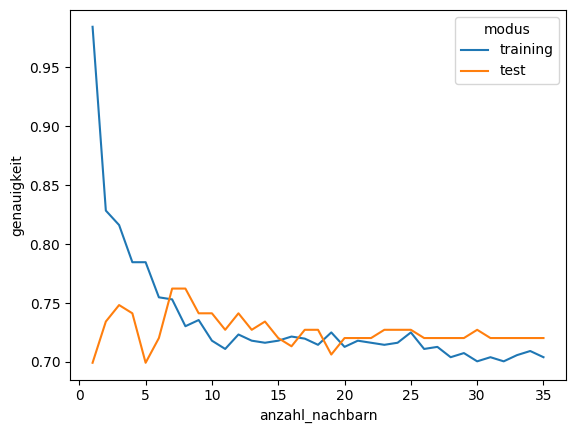

In [11]:
# visualisiere die Genauigkeit für verschiedene Werte von n_neighbors
# für die Trainings- und Testdaten
sns.lineplot(daten_genauigkeit, x="anzahl_nachbarn", y="genauigkeit", hue="modus")

<font color='blue'><b>Übung 1</b></font>  
<font color='blue'>In der Code-Zelle unten wird ein Datensatz von Merkmalen von Brust-Bildern geladen, die entweder Brustkrebs enthalten oder frei von Brustkrebs sind. Bei Interesse können Sie mehr Informationen zu dem Datensatz [Datendeskriptor](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) sowie im dazugehörigen [Forschungsartikel](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=B20185806547CEC53EE4CFC609B11264?sequence=1) finden. Der Datensatz wird in der Code-Zelle bereits in einen Trainings- und einen Testdatensatz aufgeteilt.</font>
<ul class="outside">
<li><font color='blue'>Machen Sie sich mit dem Datensatz vertraut: wie viele Beobachtungen gibt es? Wie viele Merkmale? Wie oft wurde Brustkrebs diagnostiziert?</font></li>
<li><font color='blue'>Trainieren Sie einen K nächste Nachbarn Klassifikator mit <tt>n_neighbors=11</tt> auf den Trainingsdaten. Was für eine Genauigkeit erreicht der Klassifikator auf den Testdaten?</font></li>
<li><font color='blue'>Verbessert sich die Genauigkeit, wenn Sie statt der default-Einstellung die jede Beobachtung gleich gewichtet, eine Gewichtung nach Distanz (<tt>weights="distance"</tt>) vornehmen?</font></li>
<li><font color='blue'>Probieren Sie alle Werte von <tt>n_neighbors</tt> zwischen 1 und 30 aus und visualisieren Sie das Ergebnis wie oben. Was für ein Wert liefert die beste Performance auf den Testdaten?</font></li>
</ul>
<font color='blue'></font>




In [13]:
# lade Brustkrebsdaten
from sklearn import datasets
brustkrebs = datasets.load_breast_cancer(as_frame=True)
# teile Daten in Attribute und Zielwerte
x = brustkrebs["data"]
y = brustkrebs["target"]
# teile Daten in Trainings- und Testdatensatz
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

In [11]:
# Ihr Code hier

## Regression
Neben der Klassifikation ist die [Regression](https://janalasser.at/lectures/MC_KI/VO2_5_regression/) (vorhersage eines Numerischen Wertes) der zweite große Anwendungsbereich des überwachten Lernens. Die Implementierung eines Algorithmus zur Regression in Python läuft sehr ähnlich zur Implementierung eines Klassifikators ab.  

Im Folgenden illustrieren wir das anhand eines Beispieldatensatzes von Diabetespatienten. Wir interessieren uns dabei für die Vorhersage des Fortschrittes der Diabeteserkrankung anhand von Indikatoren wie Alter, Geschlecht, BMI und Blutwerten.

In [14]:
diabetes = datasets.load_diabetes(as_frame=True)
x = diabetes["data"]
y = diabetes["target"]

In [15]:
# 10 Attribute: Alter, Geschlecht, BMI, Blutdruck sowie sechs Blutserumswerte
# (tc, ldl, hdl, tch, ltg, glu) von 442 Diabetespatient:innen.
# Vorverarbeitung: Die Werte wurden zentriert (Mittelwert abgezogen) und mit
# der Standardabweichung * sqrt(Anzahl Beobachtungen) skaliert
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: xlabel='age', ylabel='Count'>

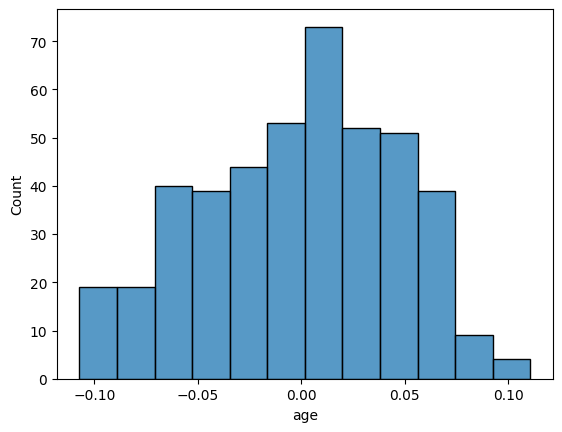

In [16]:
sns.histplot(data=x, x="age")

<Axes: xlabel='sex', ylabel='Count'>

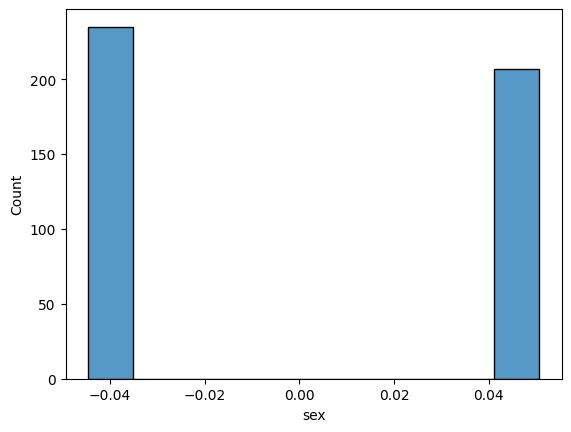

In [17]:
sns.histplot(data=x, x="sex")

In [18]:
# Zielwert: ein Maß für den Fortschritt der Diabeteserkrankung
# nach einem Jahr
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


<Axes: xlabel='bp', ylabel='fortschritt'>

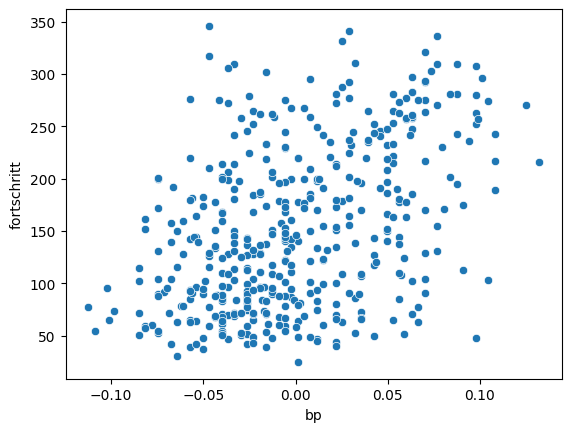

In [19]:
# Wir visualisieren den Diabetesfortschritt über dem Blutdruck "bp"

# erzeuge ein DataFrame, in dem sowohl die Attribute als auch der
# Zielwert als Spalten enthalten sind
plot_data = diabetes["data"].copy()
plot_data["fortschritt"] = diabetes["target"]

# verwende die scatterplot()-Funktion von seaborn, um die
# Daten darzustellen. Offenbar gibt es einen Zusammenhang
# zwischen dem Blutdruck und dem Diabetesfortschritt
sns.scatterplot(plot_data, x="bp", y="fortschritt")

Wir wollen nun eine Funktion finden, die den Zusammenhang zwischen Attributen und Zielwert bestmöglich beschreibt. Wir beschränken uns hierbei auf lineare Funktionen (lineare Regression).

<div>
<img src="https://drive.google.com/uc?id=1XoEgQPVFmyVnRYvv64_ccEpB0l08L0xz" width="400"/>
</div>

In [22]:
# zu Illustrationszwecken beschränken wir uns erstmal auf einen
# Attributswert (Blutdruck, "bp")
interessante_spalten = ["bp"]
x = diabetes["data"][interessante_spalten]

In [23]:
# Aufteilen der Daten in Training- und Testdatensatz
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# importiere den linearen Regressor aus scikit-learn
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
# trainiere das Modell mit den Trainingsdaten
linear_regressor.fit(x_training, y_training)

LinearRegression()

In [24]:
# sage den Diabetesfortschritt für die Testdaten voraus
vorhersagen = linear_regressor.predict(x_test)

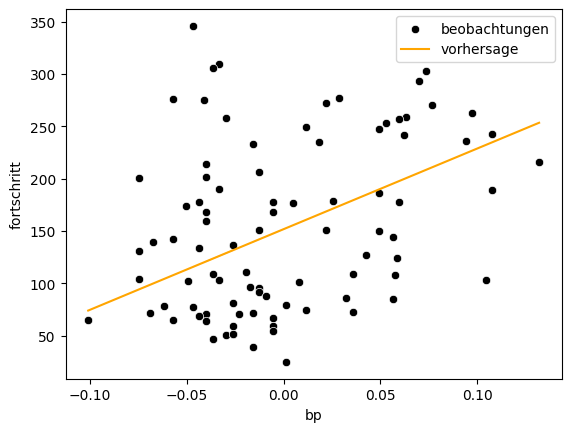

In [26]:
# erzeuge ein DataFrame, indem sowohl die Attribute als auch der
# Zielwert und die Vorhersagen als Spalten enthalten sind
plot_data = x_test.copy()
plot_data["fortschritt"] = y_test
plot_data["vorhersage"] = vorhersagen

# visualisiere die Beobachtungen und die Vorhersage
sns.scatterplot(plot_data, x="bp", y="fortschritt", color="black", label="beobachtungen")
sns.lineplot(plot_data, x="bp", y="vorhersage", color="orange", label="vorhersage");

## Performance von Regression messen
Wie in der [Vorlesung](https://janalasser.at/lectures/MC_KI/VO2_5_regression/#/2/1/3) besprochen, können wir für die Regression nicht auf Fehlerklassen wie "falsch positiv" oder "falsch negativ" zurückgreifen, um die Fehlerrate bzw. Performance des Modells zu messen. Stattdessen messen wir die Abweichung der wahren Beobachtungen von der Vorhersage, bzw. die mittlere quadrierte Abweichung (root mean squared error, RMSE).

<div>
<img src="https://drive.google.com/uc?id=1trkOMRqquwQw_ILVaI92KNer84YzqxPN" width="400"/>
</div>

In [27]:
# importiere die Funktion für die mittlere quadrierte Abweichung aus scikit-learn
from sklearn.metrics import mean_squared_error
# importiere die Wurzelfunktion aus dem math Modul
from math import sqrt

# berechne die Wurzel aus der mittleren quadrierten Abweichung für die Testdaten
MSE = mean_squared_error(y_test, vorhersagen)
RMSE = sqrt(MSE)
print(f"Wurzel der mittleren quadratischen Abweichung (Testdaten): {RMSE}")

Wurzel der mittleren quadratischen Abweichung (Testdaten): 77.14989317100934


Zum Vergleich wollen wir auch hier noch mal die Performance auf den Trainingsdaten ausrechnen:

In [28]:
# sage den Diabetesfortschritt für die Trainingsdaten voraus
vorhersagen_training = linear_regressor.predict(x_training)

# berechne die Wurzel aus der mittleren quadrierten Abweichung
MSE_training = mean_squared_error(y_training, vorhersagen_training)
RMSE_training = sqrt(MSE_training)
print(f"Wurzel der mittleren quadratischen Abweichung (Trainingsdaten): {RMSE_training}")

Wurzel der mittleren quadratischen Abweichung (Trainingsdaten): 66.97703354879425


In [29]:
# alterntiv lässt sich die Übereinstimmung von Vorhersage und wahren Werten auch
# mit dem (Pearson)-Korrelationskoeffizient überprüfen
plot_data[["fortschritt", "vorhersage"]].corr(method="pearson")

,fortschritt,vorhersage
fortschritt,1.000000,0.326832
vorhersage,0.326832,1.000000


<font color='blue'><b>Übung 2</b></font>  
<font color='blue'>Zu Illustrationszwecken haben wir für die Vorhersage des Diabetesfortschrittes nur die Spalte mit dem Blutdruck "bp" verwendet. Trainieren Sie das Modell noch einmal, diesmal mit allen verfügbaren Merkmalen. Wird die mittlere quadratische Abweichung besser?</font>

## Hausaufgaben

Die Hausaufgaben für diesen Kursteil finden sich in [diesem Notebook](https://colab.research.google.com/drive/1myBeee7BfPWCjxdqWL5gZk8buOz4gRpZ?usp=sharing).

## Weiterführende Materialien
* **machine learning**: [Buch](https://www.amazon.de/Introduction-Machine-Learning-Python-Scientists/dp/1449369413?shipTo=AT&source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A3JWKAKR8XB7XF&language=de_DE&gQT=1) Introduction to Machine Learning with Python: A Guide for Data Scientists mit umfassenden [Beispielen und Übungen](https://github.com/amueller/introduction_to_ml_with_python) in Python.

## Quelle und Lizenz

Das vorliegende Notebook wurde von Jana Lasser für den Kurs B "technische Aspekte" des Microcredentials "KI und Gesellschaft" der Universität Graz erstellt.

Das Notebook kann unter den Bedingungen der Lizenz [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0) verwendet, modifiziert und weiterverbreitet werden.
